# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [331]:
! pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install -q SciencePlots

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
from pandas_profiling import ProfileReport
from matplotlib.ticker import PercentFormatter
import pandas_profiling as pp
from datetime import datetime, time
import random
pd.set_option('display.max_columns', None)
plt.style.use(['science','notebook','grid'])

In [333]:
file = '1991_Accidents_UK.csv'
df_1991 = pd.read_csv(file,index_col='accident_index')

C:\Users\wessam\AppData\Local\Temp\ipykernel_9532\3283432909.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1991 = pd.read_csv(file,index_col='accident_index')


In [334]:
df_1991.head()

accident_year accident_reference  location_easting_osgr  \
accident_index                                                            
1991010SU0975            1991          010SU0975               521300.0   
1991010SU0976            1991          010SU0976               521300.0   
1991010SU0977            1991          010SU0977               522100.0   
199101AB00001            1991          01AB00001               529970.0   
199101AB00002            1991          01AB00002               528910.0   

                location_northing_osgr  longitude  latitude  \
accident_index                                                
1991010SU0975                 201700.0        NaN       NaN   
1991010SU0976                 201700.0        NaN       NaN   
1991010SU0977                 200300.0        NaN       NaN   
199101AB00001                 178300.0        NaN       NaN   
199101AB00002                 178790.0        NaN       NaN   

                       police_force accident_severity  number_of_vehicles  \
accident_index                                                              
1991010SU0975   Metropolitan Police           Serious                   2   
1991010SU0976   Metropolitan Police            Slight                   2   
1991010SU0977   Metropolitan Police           Serious                   2   
199101AB00001   Metropolitan Police            Slight                   2   
199101AB00002   Metropolitan Police            Slight                   1   

                number_of_casualties        date day_of_week   time  \
accident_index                                                        
1991010SU0975                      4  17/08/1991    Saturday  09:48   
1991010SU0976                      1  06/08/1991     Tuesday  00:05   
1991010SU0977                      1  22/07/1991      Monday  13:15   
199101AB00001                      1  06/01/1991      Sunday  00:25   
199101AB00002                      1  13/01/1991      Sunday  12:02   

               local_authority_district  local_authority_ons_district  \
accident_index                                                          
1991010SU0975                 Hertsmere                            -1   
1991010SU0976                 Hertsmere                            -1   
1991010SU0977                 Hertsmere                            -1   
199101AB00001               Westminster                            -1   
199101AB00002               Westminster                            -1   

                local_authority_highway first_road_class first_road_number  \
accident_index                                                               
1991010SU0975                        -1         Motorway              25.0   
1991010SU0976                        -1         Motorway              25.0   
1991010SU0977                        -1         Motorway              25.0   
199101AB00001                        -1                A             202.0   
199101AB00002                        -1                B             310.0   

                               road_type  speed_limit  \
accident_index                                          
1991010SU0975           Dual carriageway         70.0   
1991010SU0976           Dual carriageway         70.0   
1991010SU0977           Dual carriageway         70.0   
199101AB00001           Dual carriageway         30.0   
199101AB00002   One way street/Slip road         30.0   

                                    junction_detail  \
accident_index                                        
1991010SU0975   Not at junction or within 20 metres   
1991010SU0976   Not at junction or within 20 metres   
1991010SU0977   Not at junction or within 20 metres   
199101AB00001                            Crossroads   
199101AB00002               T or staggered junction   

                            junction_control second_road_class  \
accident_index                                                   
1991010SU0975   Data missing or o

In [335]:
profile = ProfileReport(df_1991)

In [336]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [337]:
df_1991.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235889 entries, 1991010SU0975 to 1991986016491
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                235889 non-null  int64  
 1   accident_reference                           235889 non-null  object 
 2   location_easting_osgr                        235781 non-null  float64
 3   location_northing_osgr                       235781 non-null  float64
 4   longitude                                    0 non-null       float64
 5   latitude                                     0 non-null       float64
 6   police_force                                 235889 non-null  object 
 7   accident_severity                            235889 non-null  object 
 8   number_of_vehicles                           235889 non-null  int64  
 9   number_of_casualties                         

In [338]:
df_1991.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count       235889.0          235781.000000           235781.000000   
mean          1991.0          437613.789194           306965.936059   
std              0.0           96439.393594           165065.922257   
min           1991.0              10.000000             2900.000000   
25%           1991.0          371600.000000           179630.000000   
50%           1991.0          438520.000000           277300.000000   
75%           1991.0          523300.000000           400600.000000   
max           1991.0          948400.000000           996200.000000   

       longitude  latitude  number_of_vehicles  number_of_casualties  \
count        0.0       0.0       235889.000000         235889.000000   
mean         NaN       NaN            1.771138              1.319977   
std          NaN       NaN            0.758587              0.796498   
min          NaN       NaN            1.000000              1.000000   
25%          NaN       NaN            1.000000              1.000000   
50%          NaN       NaN            2.000000              1.000000   
75%          NaN       NaN            2.000000              1.000000   
max          NaN       NaN           66.000000             34.000000   

       local_authority_ons_district  local_authority_highway    speed_limit  \
count                      235889.0                 235889.0  235889.000000   
mean                           -1.0                     -1.0      38.921603   
std                             0.0                      0.0      13.904231   
min                            -1.0                     -1.0       0.000000   
25%                            -1.0                     -1.0      30.000000   
50%                            -1.0                     -1.0      30.000000   
75%                            -1.0                     -1.0      50.000000   
max                            -1.0                     -1.0      80.000000   

       lsoa_of_accident_location  
count                   235889.0  
mean                        -1.0  
std                          0.0  
min                         -1.0  
25%                         -1.0  
50%                         -1.0  
75%                         -1.0  
max                         -1.0

# 2- EDA

# Questions to understand the Dataset:


1- what is the effect of `road_type` on `speed_limit` ?
<br>
2- Which `local_authority_district` has the most accidents ?
<br>
3- Is there a relation between `weather_conditions` and `accident_severity` ?
<br>
4- How we can explain the relation between `first_road_class` and `road_type` ?
<br>
5- What is the relation between `number_of_vehicles` and `accident_severity` ?
<br>
6- What is the relation between `pedestrian_crossing_human_control` and `pedestrian_crossing_physical_facilities` ?

# What is the effect of `road_type` on `speed_limit` ?

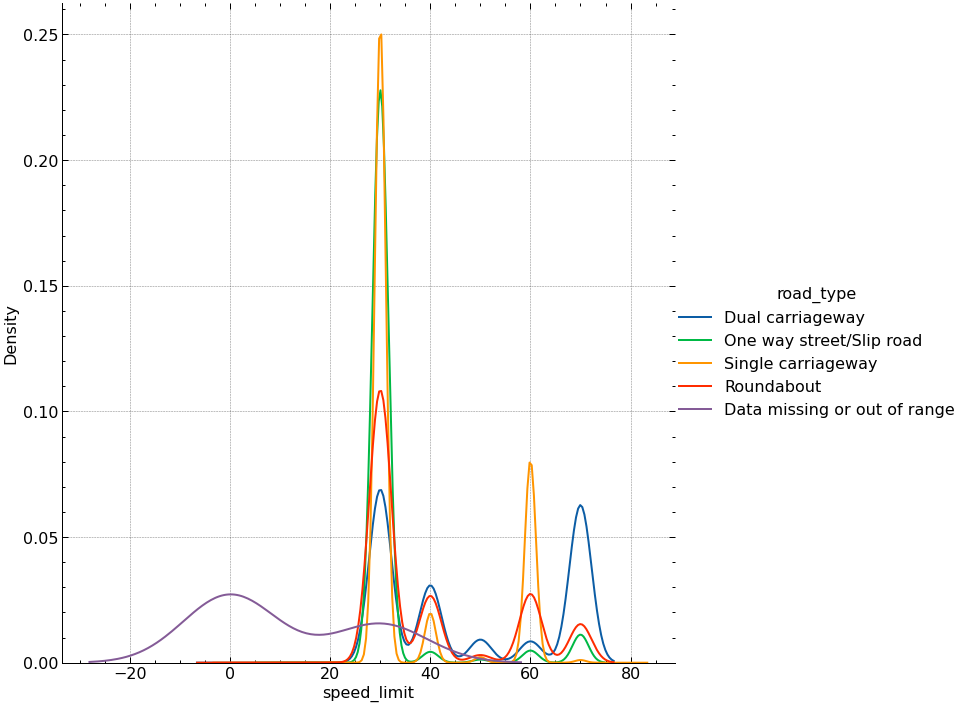

In [339]:
sns.FacetGrid(df_1991,height=10,hue="road_type").map(sns.kdeplot,"speed_limit").add_legend()

### Conclusion:

We conclude that the road type and the speed limit are highly correlated

# Which `local_authority_district` has the most accidents ?

<AxesSubplot:>

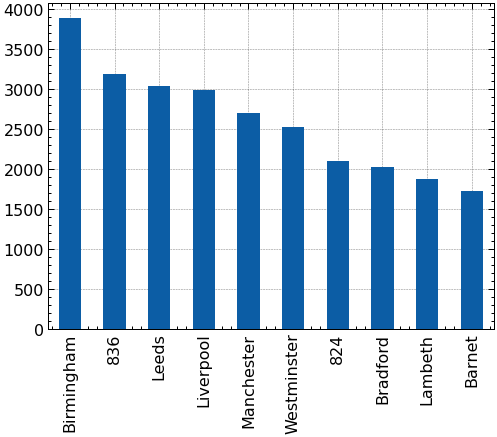

In [340]:
most_accidents = df_1991['local_authority_district'].value_counts()[:10]
most_accidents.plot(kind = 'bar')

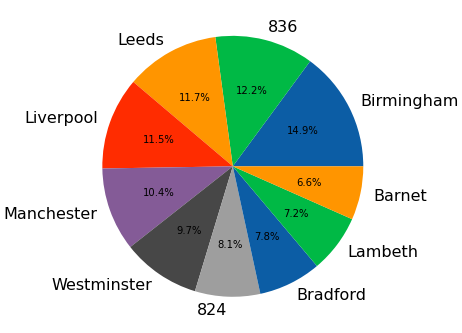

In [341]:
most_accidents = df_1991['local_authority_district'].value_counts()[:10]
mylabels=df_1991['local_authority_district'].value_counts().index[:10]
plt.pie(most_accidents, labels = mylabels, autopct='%1.1f%%')
plt.show()

### Conclusion:

From the previous graphs we can conclude that most of the accidents happened in Birmingham district

# Is there a relation between `weather_conditions` and `accident_severity`?

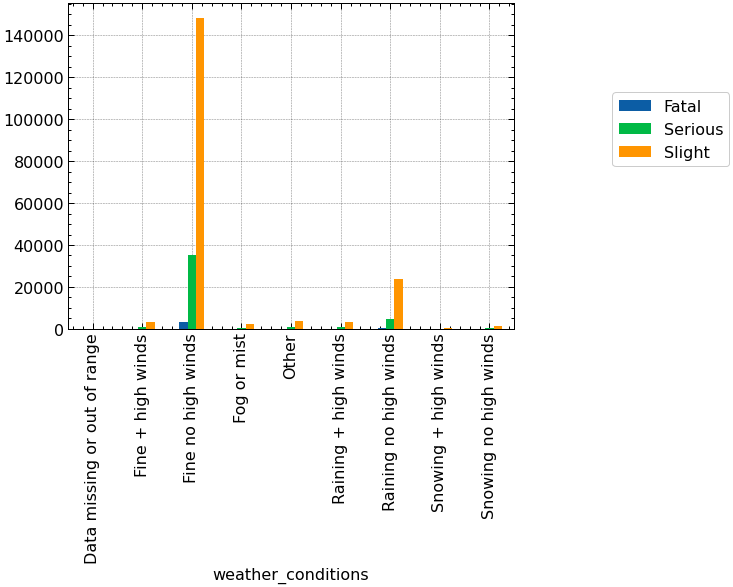

In [342]:
weather=df_1991['weather_conditions']
accident=df_1991['accident_severity']
weather_severity = pd.crosstab(index=weather,columns=accident)
plot_cross = weather_severity.plot(kind="bar",stacked=False)
plot_cross.legend(bbox_to_anchor=(1.5,0.75))

### Conclusion:

We conclude that, most traffic happens when the weather is "Fine no high winds" and due to traffic, most accidents occur varying from slight,serious and fatal accidents.
<br>
When the weather is "Raining with no high winds", traffic decreases meaning that people are more aware of the weather but some of them still are on road causing accidents.
<br>
when the weather is "Raining + high winds" and "Fine + high winds", means that the traffic decreases and people are mostly aware of the weather, but accidents still happen.

# How we can explain the relation between `first_road_class` and `road_type` ?

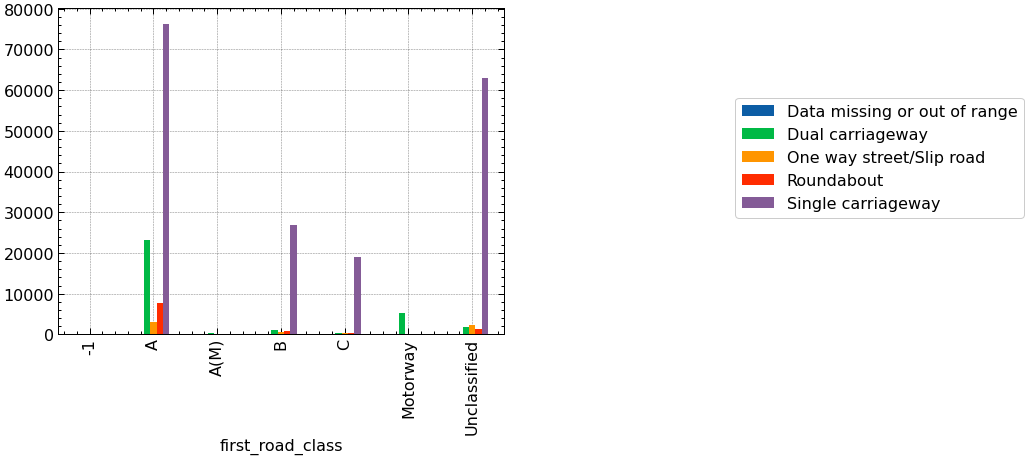

In [343]:
roadclass=df_1991['first_road_class']
roadtype=df_1991['road_type']
road_accident = pd.crosstab(index=roadclass,columns=roadtype)
plot_cross = road_accident.plot(kind="bar",stacked=False)
plot_cross.legend(bbox_to_anchor=(1.5,0.75))

### Conclusion:

We conclude that, accidents that occur in class A,B,C happens mostly in "Single carriageway" except in motorway, accidents happen in "Dual carriageway".

# What is the relation between `number_of_vehicles` and `accident_severity` ?

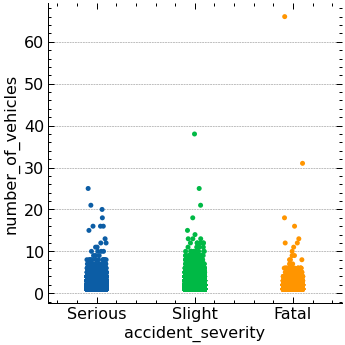

In [344]:
sns.catplot(data=df_1991, x="accident_severity", y="number_of_vehicles")

### Conclusion:

We can conclude that in higher number of vehicles (more than 10 vehicles) the accident severity becomes more serious.

# What is the relation between `pedestrian_crossing_human_control` and `pedestrian_crossing_physical_facilities` ?

<AxesSubplot:xlabel='pedestrian_crossing_human_control'>

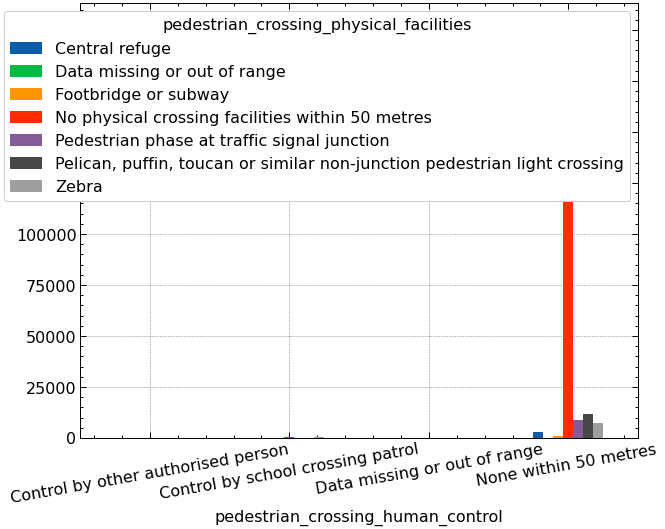

In [345]:
CrosstabResult=pd.crosstab(index=df_1991['pedestrian_crossing_human_control'],columns=df_1991['pedestrian_crossing_physical_facilities'])
CrosstabResult.plot.bar(figsize=(10,8),rot=10)

### Conclusion:

We can conclude that there exist a relation where if the pedestrian crossing human control in not found in the area within 50 metres, then probably there is no physical crossing facilities within 50 meters.

# 3 - Cleaning Data

## Observing Missing and duplicate Data

In [346]:
df_1991_copy=df_1991.copy()

In [347]:
total_missing=df_1991_copy.isnull().sum()
total_missing

accident_year                                       0
accident_reference                                  0
location_easting_osgr                             108
location_northing_osgr                            108
longitude                                      235889
latitude                                       235889
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                2
day_of_week                                         0
time                                                2
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                  19
road_type                   

#### Missing data can be of any of the following forms ( "Data missing or out of range", -1 , "-1" ). These data are replaced by NaN. Then the values "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero " are then replaced with 0.

In [348]:
df_1991_copy.replace("Data missing or out of range",np.nan,inplace=True)
df_1991_copy.replace(-1,np.nan,inplace=True)#replace -1 value to null to remove it
df_1991_copy.replace("-1",np.nan,inplace=True)
df_1991_copy.first_road_number.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",0,inplace=True)
df_1991_copy.second_road_number.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",0,inplace=True)

#### Then the missing data are as shown below:

In [349]:
df_1991_copy.isnull().sum()

accident_year                                       0
accident_reference                                  0
location_easting_osgr                             108
location_northing_osgr                            108
longitude                                      235889
latitude                                       235889
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                2
day_of_week                                         0
time                                                2
local_authority_district                            0
local_authority_ons_district                   235889
local_authority_highway                        235889
first_road_class                                    2
first_road_number                                  19
road_type                   

In [350]:
missing_percentage = df_1991_copy.isnull().sum() / len(df_1991)
missing_percentage

accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.000458
location_northing_osgr                         0.000458
longitude                                      1.000000
latitude                                       1.000000
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000008
day_of_week                                    0.000000
time                                           0.000008
local_authority_district                       0.000000
local_authority_ons_district                   1.000000
local_authority_highway                        1.000000
first_road_class                               0.000008
first_road_number                              0

In [351]:
missing_mean=df_1991_copy.isnull().mean()*100
missing_mean

accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.045784
location_northing_osgr                           0.045784
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000848
day_of_week                                      0.000000
time                                             0.000848
local_authority_district                         0.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
first_road_class                                 0.000848
first_road_num

## Handling Missing data

#### 1- All columns that has all data missing are deleted.

In [352]:
df_1991_copy.dropna(axis="columns",how="all",inplace=True) #delete all the columns that has all values are missing

#### 2- The two columns `location_easting_osgr` and `location_northing_osgr` has less than 0.05% of the data missing so the rows that has this missing values are deleted. Also for `date` and `time` columns has only two values of data missing  so the rows that has this missing values are deleted.

In [353]:
df_1991_copy.dropna(axis="index",how="all",subset=["location_easting_osgr"],inplace=True)
df_1991_copy.dropna(axis="index",how="all",subset=["location_northing_osgr"],inplace=True)
df_1991_copy.dropna(axis="index",how="all",subset=["date"],inplace=True)
df_1991_copy.dropna(axis="index",how="all",subset=["time"],inplace=True)

#### 3- The column `first_road_class` has only two values of data missing and the missing data is replaced by the frequent category variable.

In [354]:
df_1991_copy["first_road_class"].fillna(value="A",inplace=True)#frequent with cateogry

#### 4- The column `first_road_number` has a small percentage of data missing and the missing data is replaced by the Median. We chose the Median because the distribution graph indicates that the curve is not located in the middle ( Positively Skewed Distribution).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


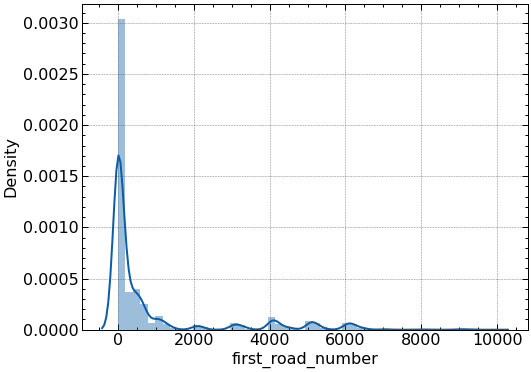

In [355]:
sns.distplot(df_1991_copy["first_road_number"])
df_1991_copy["first_road_number"].median()
df_1991_copy["first_road_number"].fillna(value=df_1991_copy["first_road_number"].median(),inplace=True)

#### 5- The column `road_type` has 982 values of data missing and the missing data is replaced by the frequent category variable.

In [356]:
df_1991_copy["road_type"].fillna(value="Single carriageway",inplace=True)#frequent with cateogry

#### 6- The column `junction_detail` has only 3 values of data missing and this missing data is replaced by the frequent category variable.

In [357]:
df_1991_copy["junction_detail"].fillna(value="Not at junction or within 20 metres",inplace=True)#frequent with cateogry

#### 7- The column `junction_control` has nearly 40% of data missing and this missing data is replaced by missing category which is "No junction".

In [358]:
df_1991_copy["junction_control"].fillna(value="No junction",inplace=True)#replace missing values according to junction control

#### 8- The two columns `second_road_class`and `second_road_number` has nearly 40% of data missing, these two columns are deleted.

In [359]:
df_1991_copy.drop('second_road_class', inplace=True, axis=1)
df_1991_copy.drop('second_road_number', inplace=True, axis=1)

#### 9- The column `pedestrian_crossing_human_control` has 129 values of data missing and this missing data is replaced by the frequent category variable.

In [360]:
df_1991_copy["pedestrian_crossing_human_control"].fillna(value="None within 50 metres",inplace=True)#frequent with cateogry

#### 10- The column `pedestrian_crossing_physical_facilities` has 129 values of data are missing and this missing data is replaced by the frequent category variable.

In [361]:
df_1991_copy["pedestrian_crossing_physical_facilities"].fillna(value="No physical crossing facilities within 50 metres",inplace=True)#frequent with cateogry

#### 11- The column `light_conditions` has 56 values of data are missing and the light conditions missing data is filled according to the time of the accident.

In [362]:
df_1991_copy = df_1991_copy.reset_index()#add another column indexes
for index, row in df_1991_copy.iterrows():
    if(type(row['light_conditions'])==float):
        datetime_object = datetime.strptime(row["time"],'%H:%M').time()
        if time(5,00) <= datetime_object <= time(18,00): 
            df_1991_copy.at[index,"light_conditions"]="Daylight"
        else:
            df_1991_copy.loc[index,"light_conditions"]="Darkness - lighting unknown"

#### 12- The column `weather_conditions` has 1513 and the column `road_surface_conditions` has 105 values of data are missing, as there is a correlation between the weather and road surface conditions, then the missing data in the `weather_conditions` is filled according to the `road_surface_conditions` and vice versa.

In [363]:
for index, row in df_1991_copy.iterrows():
    if(row['weather_conditions']=="Snowing no high winds" or row['weather_conditions']=="Snowing + high winds" and type(row['weather_conditions'])==float):
        df_1991_copy.at[index,"road_surface_conditions"]="Snow"
    if(row['weather_conditions']=="Raining no high winds" or row['weather_conditions']=="Raining + high winds"and type(row['weather_conditions'])==float):
        df_1991_copy.at[index,"road_surface_conditions"]="Wet or damp"
    if(row['road_surface_conditions']=="Snow" and type(row['weather_conditions'])==float):
        df_1991_copy.at[index,"weather_conditions"]="Snowing no high winds"
    if(row['road_surface_conditions']=="Wet or damp" and type(row['weather_conditions'])==float):
        df_1991_copy.at[index,"weather_conditions"]="Raining no high winds"  

Not all the missing data could be imputed by this method, so the rest of the missing data is filled randomly.

In [364]:
while(df_1991_copy["weather_conditions"].isnull().sum()!=0):
    df_1991_copy["weather_conditions"].fillna(np.random.choice(df_1991_copy['weather_conditions'][~df_1991_copy['weather_conditions'].isna()]),inplace = True,limit=1)
    
while(df_1991_copy["road_surface_conditions"].isnull().sum()!=0):
    df_1991_copy["road_surface_conditions"].fillna(np.random.choice(df_1991_copy['road_surface_conditions'][~df_1991_copy['road_surface_conditions'].isna()]),inplace = True,limit=1)

#### 14- The column `special_conditions_at_site` has 32 values of data are missing and this missing data is replaced by the frequent category variable.

In [365]:
df_1991_copy["special_conditions_at_site"].fillna(value="None",inplace=True)#frequent with cateogry

#### 15- The column `carriageway_hazards` has 38 values of data are missing and this missing data is replaced by the frequent category variable.

In [366]:
df_1991_copy["carriageway_hazards"].fillna(value="None",inplace=True)#frequent with cateogry

## Findings and conclusions

In [367]:
df_1991_copy.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  1991010SU0975           1991          010SU0975               521300.0   
1  1991010SU0976           1991          010SU0976               521300.0   
2  1991010SU0977           1991          010SU0977               522100.0   
3  199101AB00001           1991          01AB00001               529970.0   
4  199101AB00002           1991          01AB00002               528910.0   

   location_northing_osgr         police_force accident_severity  \
0                201700.0  Metropolitan Police           Serious   
1                201700.0  Metropolitan Police            Slight   
2                200300.0  Metropolitan Police           Serious   
3                178300.0  Metropolitan Police            Slight   
4                178790.0  Metropolitan Police            Slight   

   number_of_vehicles  number_of_casualties        date day_of_week   time  \
0                   2                     4  17/08/1991    Saturday  09:48   
1                   2                     1  06/08/1991     Tuesday  00:05   
2                   2                     1  22/07/1991      Monday  13:15   
3                   2                     1  06/01/1991      Sunday  00:25   
4                   1                     1  13/01/1991      Sunday  12:02   

  local_authority_district first_road_class first_road_number  \
0                Hertsmere         Motorway              25.0   
1                Hertsmere         Motorway              25.0   
2                Hertsmere         Motorway              25.0   
3              Westminster                A             202.0   
4              Westminster                B             310.0   

                  road_type  speed_limit                      junction_detail  \
0          Dual carriageway         70.0  Not at junction or within 20 metres   
1          Dual carriageway         70.0  Not at junction or within 20 metres   
2          Dual carriageway         70.0  Not at junction or within 20 metres   
3          Dual carriageway         30.0                           Crossroads   
4  One way street/Slip road         30.0              T or staggered junction   

      junction_control pedestrian_crossing_human_control  \
0          No junction            None within 50 metres    
1          No junction            None within 50 metres    
2          No junction            None within 50 metres    
3  Auto traffic signal            None within 50 metres    
4            Stop sign            None within 50 metres    

            pedestrian_crossing_physical_facilities        light_conditions  \
0  No physical crossing facilities within 50 metres                Daylight   
1  No physical crossing facilities within 50 metres  Darkness - no lighting   
2  No physical crossing facilities within 50 metres                Daylight   
3  No physical crossing facilities within 50 metres   Darkness - lights lit   
4  No physical crossing facilities within 50 metres                Daylight   

   weather_conditions road_surface_conditions special_conditions_at_site  \
0  Fine no high winds                     Dry                       None   
1  Fine no high winds                     Dry                       None   
2  Fine no high winds                     Dry                  Roadworks   
3   Fine + high winds             Wet or damp                       None   
4  Fine no high winds                     Dry                       None   

    carriageway_hazards  
0                  None  
1                  None  
2  Other object on road  
3                  None  
4                  None

In [368]:
df_1991_copy.isnull().sum()

accident_index                             0
accident_year                              0
accident_reference                         0
location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_co

- Missing data occurs when no data is stored for a certain observation in a variable.
- Missing data in our dataset can be of any of the following forms ( "Data missing or out of range", -1 , "-1" ). These data are replaced by NaN. Then the values "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero " are then replaced with 0.
- Missing data is introduced by mechanisms, it can be:

1- Missing Completely At Random (MCAR):
<br>
It occurss when all the missing data is randomly missing, without any relationship exists between missing data and any other values (either missing or observed) within the dataset. i.e. the probability of being missing is the same for all observations.  Causes of the missing data are unrelated to the data.
<br>
2- Missing At Random (MAR):
<br>
It occurs when there is a systematic relationship between the missing values and the observed data. i.e. the probability of being missing depends on available information.
<br>
3- Missing Not At Random (MNAR):
<br>
It occurs when the missing data has a relationship with another variable. i.e. when there exists a reason or mechanism why missing values are introduced in dataset.
<br>
- In our dataset we have a vareity of missing data can be detected and described as follows:
<br>

1- Columns that has all values are missing as `longitude`, `latitude`, `local_authority_ons_district `, `local_authority_highway`, `urban_or_rural_area`, `did_police_officer_attend_scene_of_accident `, `trunk_road_flag` and `lsoa_of_accident_location`. These columns with all data missing are deleted.
<br>

2- `location_easting_osgr` and `location_northing_osgr` has less than 0.05% of the data missing, and this data is Missing Completely At Random (MCAR). Therefor Complete Case Analysis (CCA) technique is used for missing data imputation, where the rows that has this missing data are deleted.
<br>

3- `date` and `time` has only 2 values of data are missing (nearly 0.0008% < 5% of data), and this data is Missing Completely At Random (MCAR). Therefor Complete Case Analysis (CCA) technique is used for missing data imputation, where the rows that has this missing data are deleted.
<br>

4- `first_road_class`has only 2 values of data are missing (nearly 0.0008% < 5% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

5- `first_road_number` has only 19 values of data are missing (nearly 0.008% < 5% of data), and this data is Missing Completely At Random (MCAR). There for Mean/Median Imputation is used. In our case we chose imputation of missing data by Median because as we conclude from the graph that our distribution of missing data is Positively Skewed Distribution, so Median is a better representation.
<br>

6- `road_type` has 982 values of data are missing (nearly 0.416% < 5% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

7- `junction_detail` has only 3 values of data missing (nearly 0.0012% < 5% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

8- `junction_control` has 93754 values of data are missing (nearly 40% of data) which is a high percentage of data to be dropped or replaced by the most frequent variable, and this data is Missing Not At Random (MNAR) as the missing data is has a relation with 'junction_detail', where every value of data missing in 'junction_control' is because it is "Not at junction or within 20 metres" in 'junction_detail'. Therefor Missing Category Imputation technique is used for missing data imputation, where missing data is replaced by missing category named "No Junction".
<br>

9- `second_road_class` has 94452 values of data are missing (nearly 40.03% of data) which is a high percentage of data to be dropped or replaced by the most frequent variable, and this data is Missing Completely At Random (MCAR). This missing data can not be imputed using Frequent Category or Random sample imputation to avoid the over-representation of the most frequent category, Distortion of the relation (covariance) between frequent category and other variables in the dataset, due to high percentage of missing data. Therefor this column is deleted.
<br>

10- `second_road_number` has 94476 values of data are missing (nearly 40.05% of data) which is a high percentage of data to be dropped or replaced by the most frequent variable, and this data is Missing Completely At Random (MCAR). This missing data can not be imputed using Frequent Category or Random sample imputation to avoid the over-representation of the most frequent category, Distortion of the relation (covariance) between frequent category and other variables in the dataset, due to high percentage of missing data. Therefor this column is deleted.
<br>

11-`pedestrian_crossing_human_control` has 129 values of data are missing (nearly 0.054% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

12-`pedestrian_crossing_physical_facilities` has 129 values of data are missing (nearly 0.054% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

13-`light_conditions` has 56 values of data are missing (nearly 0.023% of data), and this data is Missing At Random (MAR). There is a relation exists between the light conditions and the time of the accident. Therefor the missing data is filled according to the time of the accident, where if the time is between 5:00 to 18:00 then the light conditions is "Daylight", else the light conditions is "Darkness - lighting unknown".
<br>

14-`weather_conditions` has 1513 values of data are missing (nearly 0.64% of data), `road_surface_conditions` has 105 values of data are missing (nearly 0.044% of data), and this data is Missing At Random (MAR). There is a correlation between the weather and road surface conditions. Therefor the missing data is filled as follows:
 - The `road_surface_conditions` is filled according to the weather conditions, where if the weather is "Snowing no high winds" or "Snowing + high winds" the road surface condition is "Snow",  and if the weather is "Raining no high winds" or "Raining + high winds" the road surface condition is "Wet or damp".
 - The `weather_conditions` is filled according to the road surface conditions, where if the road surface is "Snow" the weather is "Snowing no high winds", and if the road surface is "Wet or damp" the weather is "Raining no high winds".
<br>

15-`special_conditions_at_site` has 32 values of data are missing (nearly 0.013% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>

16-`carriageway_hazards` has 38 values of data are missing (nearly 0.016% of data), and this data is Missing Completely At Random (MCAR). Therefor Frequent Category Imputation technique is used for missing data imputation, where missing data is replaced by the most frequent category variable.
<br>


## Observing outliers

In [369]:
df_1991_copy.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count       235779.0          235779.000000           235779.000000   
mean          1991.0          437614.038655           306967.731138   
std              0.0           96439.761876           165065.471647   
min           1991.0              10.000000             2900.000000   
25%           1991.0          371600.000000           179630.000000   
50%           1991.0          438520.000000           277300.000000   
75%           1991.0          523300.000000           400600.000000   
max           1991.0          948400.000000           996200.000000   

       number_of_vehicles  number_of_casualties    speed_limit  
count       235779.000000          235779.00000  235779.000000  
mean             1.771159               1.31988      38.921736  
std              0.758607               0.79639      13.902761  
min              1.000000               1.00000       0.000000  
25%              1.000000               1.00000      30.000000  
50%              2.000000               1.00000      30.000000  
75%              2.000000               1.00000      50.000000  
max             66.000000              34.00000      80.000000

## Handling outliers

### Outliers `location_easting_osgr`

In [370]:
location_easting_osgr= df_1991_copy['location_easting_osgr'].sort_values()
print(location_easting_osgr)

20439         10.0
216911     21900.0
216908     65200.0
216925     66700.0
216910     67100.0
            ...   
216905    932000.0
216931    935400.0
216873    943500.0
131055    943800.0
216874    948400.0
Name: location_easting_osgr, Length: 235779, dtype: float64


In [371]:
outliers_location_easting_osgr=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_location_easting_osgr.append(i)
    return outliers_location_easting_osgr

In [372]:
outliers_pt_location_easting_osgr= detect_outliers(location_easting_osgr)

In [373]:
outliers_pt_location_easting_osgr

[10.0,
 21900.0,
 65200.0,
 66700.0,
 67100.0,
 68400.0,
 69600.0,
 75500.0,
 75800.0,
 76400.0,
 76500.0,
 76700.0,
 76800.0,
 80000.0,
 80400.0,
 81600.0,
 82500.0,
 82880.0,
 84430.0,
 84700.0,
 87000.0,
 87200.0,
 92740.0,
 97800.0,
 99500.0,
 101600.0,
 103500.0,
 104100.0,
 106700.0,
 107400.0,
 110400.0,
 111300.0,
 115500.0,
 116530.0,
 118300.0,
 119400.0,
 120300.0,
 120400.0,
 122000.0,
 122700.0,
 123300.0,
 123300.0,
 123400.0,
 125800.0,
 125900.0,
 126100.0,
 127500.0,
 127600.0,
 127900.0,
 128300.0,
 129300.0,
 129500.0,
 130600.0,
 130900.0,
 130900.0,
 131100.0,
 131100.0,
 131200.0,
 131400.0,
 131500.0,
 131700.0,
 132020.0,
 132800.0,
 133100.0,
 133480.0,
 133600.0,
 133600.0,
 133600.0,
 133900.0,
 134500.0,
 134500.0,
 135000.0,
 135300.0,
 135400.0,
 135600.0,
 135700.0,
 135800.0,
 135800.0,
 135900.0,
 136000.0,
 136500.0,
 136700.0,
 136800.0,
 136800.0,
 136980.0,
 137500.0,
 137620.0,
 137860.0,
 138300.0,
 138300.0,
 138540.0,
 138600.0,
 138800.0,
 1388

In [374]:
quantile1_location_easting_osgr, quantile3_location_easting_osgr= np.percentile(location_easting_osgr,[25,75])

In [375]:
print(quantile1_location_easting_osgr,quantile3_location_easting_osgr)

371600.0 523300.0


151700.0
144050.0 295750.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_easting_osgr'>

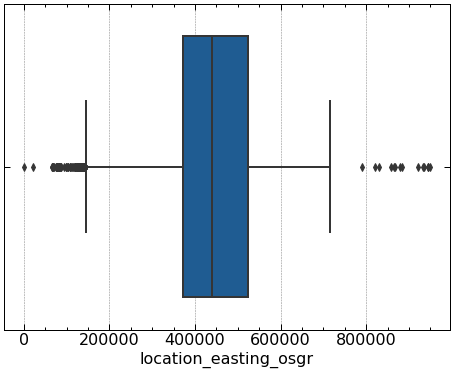

In [376]:
iqr_value= quantile3_location_easting_osgr-quantile1_location_easting_osgr
print(iqr_value)

lower_bound_val= quantile1_location_easting_osgr -(1.5* iqr_value)
upper_bound_val= quantile3_location_easting_osgr -(1.5* iqr_value)
print(lower_bound_val, upper_bound_val)
sns.boxplot(location_easting_osgr)

### Outliers `location_northing_osgr`

In [377]:
location_northing_osgr= df_1991_copy['location_northing_osgr'].sort_values()
print(location_northing_osgr)

216791      2900.0
216773      6900.0
190616      7060.0
194382      7080.0
193848      7240.0
            ...   
216983    972200.0
216990    973400.0
217299    978700.0
59883     982000.0
217036    996200.0
Name: location_northing_osgr, Length: 235779, dtype: float64


In [378]:
outliers_location_northing_osgr=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_location_northing_osgr.append(i)
    return outliers_location_northing_osgr

In [379]:
outliers_pt_location_northing_osgr= detect_outliers(location_northing_osgr)

In [380]:
outliers_pt_location_northing_osgr

[802200.0,
 802300.0,
 802300.0,
 802300.0,
 802300.0,
 802600.0,
 802600.0,
 802600.0,
 802700.0,
 802700.0,
 802700.0,
 802800.0,
 802800.0,
 802800.0,
 802900.0,
 802900.0,
 802900.0,
 802900.0,
 802900.0,
 803000.0,
 803000.0,
 803000.0,
 803100.0,
 803100.0,
 803200.0,
 803200.0,
 803200.0,
 803200.0,
 803200.0,
 803200.0,
 803300.0,
 803300.0,
 803300.0,
 803300.0,
 803400.0,
 803400.0,
 803400.0,
 803400.0,
 803400.0,
 803500.0,
 803500.0,
 803500.0,
 803500.0,
 803500.0,
 803500.0,
 803500.0,
 803600.0,
 803600.0,
 803600.0,
 803600.0,
 803600.0,
 803600.0,
 803700.0,
 803700.0,
 803700.0,
 803700.0,
 803700.0,
 803700.0,
 803800.0,
 803800.0,
 803800.0,
 803800.0,
 803800.0,
 803800.0,
 803800.0,
 803900.0,
 803900.0,
 803900.0,
 803900.0,
 803900.0,
 803900.0,
 804000.0,
 804000.0,
 804100.0,
 804100.0,
 804100.0,
 804100.0,
 804100.0,
 804200.0,
 804200.0,
 804200.0,
 804200.0,
 804200.0,
 804300.0,
 804300.0,
 804300.0,
 804300.0,
 804300.0,
 804300.0,
 804300.0,
 804300.0,

151700.0
-47920.0 173050.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_northing_osgr'>

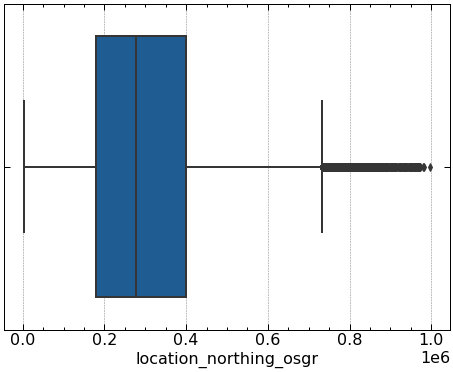

In [381]:
quantile1_location_northing_osgr, quantile3_location_northing_osgr= np.percentile(location_northing_osgr,[25,75])

iqr_value1= quantile3_location_northing_osgr-quantile1_location_northing_osgr
print(iqr_value)

lower_bound_val1= quantile1_location_northing_osgr -(1.5* iqr_value)
upper_bound_val1= quantile3_location_northing_osgr -(1.5* iqr_value)
print(lower_bound_val1, upper_bound_val1)
sns.boxplot(location_northing_osgr)

### Outliers `number_of_vehicles`

In [382]:
number_of_vehicles= df_1991_copy['number_of_vehicles'].sort_values()
print(number_of_vehicles)

117889     1
117034     1
117033     1
117032     1
117030     1
          ..
154811    25
154822    25
90819     31
99587     38
123346    66
Name: number_of_vehicles, Length: 235779, dtype: int64


In [383]:
outliers_number_of_vehicles=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_number_of_vehicles.append(i)
    return outliers_number_of_vehicles

In [384]:
outliers_pt_number_of_vehicles= detect_outliers(number_of_vehicles)

In [385]:
outliers_pt_number_of_vehicles

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [386]:
quantile1_number_of_vehicles, quantile3_number_of_vehicles= np.percentile(number_of_vehicles,[25,75])

151700.0
-227549.0 -227548.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_vehicles'>

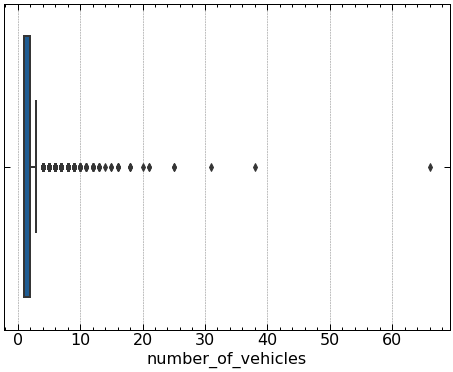

In [387]:
iqr_value2= quantile3_number_of_vehicles-quantile1_number_of_vehicles
print(iqr_value)

lower_bound_val2= quantile1_number_of_vehicles -(1.5* iqr_value)
upper_bound_val2= quantile3_number_of_vehicles -(1.5* iqr_value)
print(lower_bound_val2, upper_bound_val2)
sns.boxplot(number_of_vehicles)

### Outliers `number_of_casualties`

In [388]:
number_of_casualties= df_1991_copy['number_of_casualties'].sort_values()
print(number_of_casualties)

117889     1
147303     1
147304     1
147305     1
147307     1
          ..
226056    24
216974    25
169457    26
179986    32
142316    34
Name: number_of_casualties, Length: 235779, dtype: int64


In [389]:
outliers_number_of_casualties=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_number_of_casualties.append(i)
    return outliers_number_of_casualties

In [390]:
outliers_pt_number_of_casualties= detect_outliers(number_of_casualties)

In [391]:
outliers_pt_number_of_casualties

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


0.0
1.0 1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_casualties'>

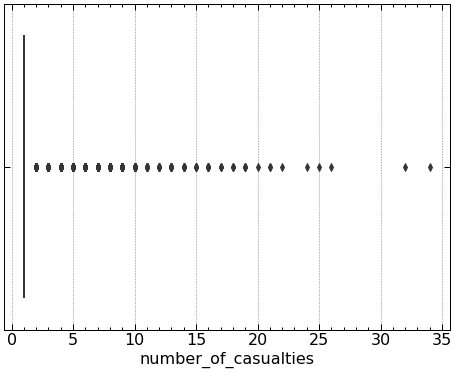

In [392]:
quantile1_number_of_casualties, quantile3_number_of_casualties= np.percentile(number_of_casualties,[25,75])

iqr_value= quantile3_number_of_casualties-quantile1_number_of_casualties
print(iqr_value)

lower_bound_val3= quantile1_number_of_casualties -(1.5* iqr_value)
upper_bound_val3= quantile3_number_of_casualties -(1.5* iqr_value)
print(lower_bound_val3, upper_bound_val3)
sns.boxplot(number_of_casualties)

### Outliers `speed_limit`

In [393]:
speed_limit= df_1991_copy['speed_limit'].sort_values()
print(speed_limit)

95504      0.0
96254      0.0
8285       0.0
145348     0.0
36307      0.0
          ... 
130849    70.0
214587    70.0
71079     80.0
14819     80.0
68866     80.0
Name: speed_limit, Length: 235779, dtype: float64


In [394]:
outliers_speed_limit=[]
def detect_outliers(data):
    
    threshold=3
    mean=np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers_speed_limit.append(i)
    return outliers_speed_limit

In [395]:
outliers_pt_speed_limit= detect_outliers(speed_limit)

In [396]:
outliers_pt_speed_limit

[]

20.0
0.0 20.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed_limit'>

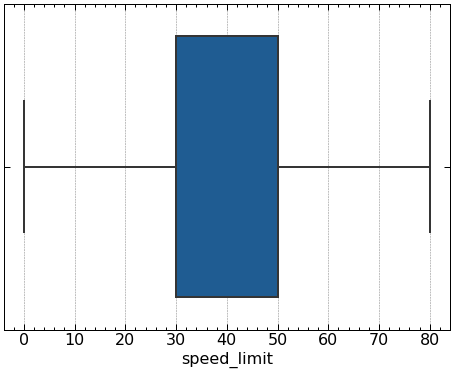

In [397]:
quantile1_speed_limit, quantile3_speed_limit= np.percentile(speed_limit,[25,75])

iqr_value= quantile3_speed_limit-quantile1_speed_limit
print(iqr_value)

lower_bound_val4= quantile1_speed_limit -(1.5* iqr_value)
upper_bound_val4= quantile3_speed_limit -(1.5* iqr_value)
print(lower_bound_val4, upper_bound_val4)
sns.boxplot(speed_limit)

## Findings and conclusions

The outlier is an observation of a data point that lies an abnormal distance from other values in a given population. To be more detailed it is an abnormal observation during the Data Analysis, that data point lies far away from other values.

Outliers are detected using:
 - Univariate methods: (quartile range, skewness, boxplot, Z-score)
 - Multivariate methods: (Scatter plots, Local Outlier Factor "LOF") 

We have used Boxplot to detect outliers in our dataset, the box plot is a useful graphical display for describing the behavior of the data in the middle and at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range (IQ). The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
<br>
 - lower inner fence: Q1 - 1.5*IQ
 - Upper inner fence: Q3 + 1.5*IQ
 - lower outer fence: Q1 - 3*IQ
 - upper outer fence: Q3 + 3*IQ

A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.

# 4 - Data transformation

## 4.1 - Discretization

#### We discretisize the data into weeks using the date by adding new column `week_number` that calculates the week number in which the accident had happened according to the date of the accident.

In [398]:
import datetime
df_1991_copy["date"] = pd.to_datetime(df_1991_copy["date"])
df_1991_copy.insert(11, 'week_number' ,df_1991_copy['date'].dt.isocalendar().week)
df_1991_copy.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/08/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/07/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/1991' in DD/MM/YYYY format. Provide format or specif

accident_index  accident_year accident_reference  location_easting_osgr  \
0  1991010SU0975           1991          010SU0975               521300.0   
1  1991010SU0976           1991          010SU0976               521300.0   
2  1991010SU0977           1991          010SU0977               522100.0   
3  199101AB00001           1991          01AB00001               529970.0   
4  199101AB00002           1991          01AB00002               528910.0   

   location_northing_osgr         police_force accident_severity  \
0                201700.0  Metropolitan Police           Serious   
1                201700.0  Metropolitan Police            Slight   
2                200300.0  Metropolitan Police           Serious   
3                178300.0  Metropolitan Police            Slight   
4                178790.0  Metropolitan Police            Slight   

   number_of_vehicles  number_of_casualties       date day_of_week  \
0                   2                     4 1991-08-17    Saturday   
1                   2                     1 1991-06-08     Tuesday   
2                   2                     1 1991-07-22      Monday   
3                   2                     1 1991-06-01      Sunday   
4                   1                     1 1991-01-13      Sunday   

   week_number   time local_authority_district first_road_class  \
0           33  09:48                Hertsmere         Motorway   
1           23  00:05                Hertsmere         Motorway   
2           30  13:15                Hertsmere         Motorway   
3           22  00:25              Westminster                A   
4            2  12:02              Westminster                B   

  first_road_number                 road_type  speed_limit  \
0              25.0          Dual carriageway         70.0   
1              25.0          Dual carriageway         70.0   
2              25.0          Dual carriageway         70.0   
3             202.0          Dual carriageway         30.0   
4             310.0  One way street/Slip road         30.0   

                       junction_detail     junction_control  \
0  Not at junction or within 20 metres          No junction   
1  Not at junction or within 20 metres          No junction   
2  Not at junction or within 20 metres          No junction   
3                           Crossroads  Auto traffic signal   
4              T or staggered junction            Stop sign   

  pedestrian_crossing_human_control  \
0            None within 50 metres    
1            None within 50 metres    
2            None within 50 metres    
3            None within 50 metres    
4            None within 50 metres    

            pedestrian_crossing_physical_facilities        light_conditions  \
0  No physical crossing facilities within 50 metres                Daylight   
1  No physical crossing facilities within 50 metres  Darkness - no lighting   
2  No physical crossing facilities within 50 metres                Daylight   
3  No physical crossing facilities within 50 metres   Darkness - lights lit   
4  No physical crossing facilities within 50 metres                Daylight   

   weather_conditions road_surface_conditions special_conditions_at_site  \
0  Fine no high winds                     Dry                       None   
1  Fine no high winds                     Dry                       None   
2  Fine no high winds                     Dry                  Roadworks   
3   Fine + high winds             Wet or damp                       None   
4  Fine no high winds                     Dry                       None   

    carriageway_hazards  
0                  None  
1                  None  
2  Other object on road  
3                  None  
4                  None

## 4.11 - Findings and conclusions

We discretisize the data into weeks using the date by adding new column `week_number` that calculates the week number in which the accident had happened according to the date of the accident.

## 4.2 - Encoding

#### In many practical data science activities, the dataset contain categorical variables. These variables are typically stored as text values. Since machine learning is based on mathematical equations, these categorical variables would cause a problem. Furthermore, encoding techniques converts these categorical variables into numberical variables to be easy to deal with in the machine learning algorithm.

There are two encoding methodologies:
- Nominal encoding: when the order of data does not matter
<br>
In nominal encoding we use "One Hot Encoding" technique.
- Ordinal encoding: when the order of data matters
<br>
In Ordinal encoding we use "Label Encoding" technique

#### One Hot Encoding

This method is used when the order of data does not matter. In this encoding method, we map each category to a vector that contains 1 and 0 denoting the presence of the feature or not. The number of vectors depends on the categories which we want to keep. For high cardinality features, this method produces a lot of columns that slows down the learning significantly.
<br>
For instance in the `day_of_week` we map this category to vector that contains the days of the week (Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday, Friday) and each day should contain 1 or 0 denoting the presence of the feature or not.

In [399]:
oneHotEncoding_df = pd.get_dummies(df_1991_copy,columns=['day_of_week','first_road_class','road_type','junction_control','pedestrian_crossing_human_control'])
oneHotEncoding_df.shape

(235779, 48)

#### Label Encoding

This method is used when the order of data matters. In this encoding method, each category is assigned a value from 1 to N (where N is the number of category for the feature). Categories that have some ties or are close to each other lose some information after encoding.
<br>
For instance in the `accident_severity` categories which are (Serious, Slight, Fatal) are assigned values (1,2,0).

In [400]:
from sklearn import preprocessing


def number_encode_features(df,columns):
    df_copy = df.copy() # take a copy of the dataframe
    for column in columns:
          df_copy[column] = preprocessing.LabelEncoder().fit_transform(df_copy[column])
    return df_copy

labelEncoded_data = number_encode_features(oneHotEncoding_df.copy(),['accident_severity','light_conditions','weather_conditions','road_surface_conditions'])
labelEncoded_data.shape

(235779, 48)

In [401]:
labelEncoded_data.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  1991010SU0975           1991          010SU0975               521300.0   
1  1991010SU0976           1991          010SU0976               521300.0   
2  1991010SU0977           1991          010SU0977               522100.0   
3  199101AB00001           1991          01AB00001               529970.0   
4  199101AB00002           1991          01AB00002               528910.0   

   location_northing_osgr         police_force  accident_severity  \
0                201700.0  Metropolitan Police                  1   
1                201700.0  Metropolitan Police                  2   
2                200300.0  Metropolitan Police                  1   
3                178300.0  Metropolitan Police                  2   
4                178790.0  Metropolitan Police                  2   

   number_of_vehicles  number_of_casualties       date  week_number   time  \
0                   2                     4 1991-08-17           33  09:48   
1                   2                     1 1991-06-08           23  00:05   
2                   2                     1 1991-07-22           30  13:15   
3                   2                     1 1991-06-01           22  00:25   
4                   1                     1 1991-01-13            2  12:02   

  local_authority_district first_road_number  speed_limit  \
0                Hertsmere              25.0         70.0   
1                Hertsmere              25.0         70.0   
2                Hertsmere              25.0         70.0   
3              Westminster             202.0         30.0   
4              Westminster             310.0         30.0   

                       junction_detail  \
0  Not at junction or within 20 metres   
1  Not at junction or within 20 metres   
2  Not at junction or within 20 metres   
3                           Crossroads   
4              T or staggered junction   

            pedestrian_crossing_physical_facilities  light_conditions  \
0  No physical crossing facilities within 50 metres                 4   
1  No physical crossing facilities within 50 metres                 3   
2  No physical crossing facilities within 50 metres                 4   
3  No physical crossing facilities within 50 metres                 1   
4  No physical crossing facilities within 50 metres                 4   

   weather_conditions  road_surface_conditions special_conditions_at_site  \
0                   1                        0                       None   
1                   1                        0                       None   
2                   1                        0                  Roadworks   
3                   0                        4                       None   
4                   1                        0                       None   

    carriageway_hazards  day_of_week_Friday  day_of_week_Monday  \
0                  None                   0                   0   
1                  None                   0                   0   
2  Other object on road                   0                   1   
3                  None                   0                   0   
4                  None                   0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     1                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   1                     0   
4                     0                   1                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  first_road_class_A  \
0                    0                      0                   0   
1                    1                      0                   0   
2                    0                      0                   0   
3                    0                 

## 4.22 - Findings and conlcusions

In "One Hot Encoding", After mapping the category into vectors, the number of vectors depends on the categories which we want to keep. For high cardinality features, this method produces a lot of columns that slows down the learning significantly.

In "Label Encoding", After assigning values from 1 to N for each category, categories that have some ties or are close to each other lose some information after encoding.

## 4.3 - Normalisation 

Normalization implies modifying our data distribution's shape, to be described as a normal distribution. The vairables we have in our dataset are either continous random variables or discrete random variables that does not need neither normalisation nor scaling.

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

In [402]:
labelEncoded_data['date'].dt.month

0          8
1          6
2          7
3          6
4          1
          ..
235774    10
235775    12
235776    11
235777    11
235778    12
Name: date, Length: 235779, dtype: int64

In [403]:
labelEncoded_data['Month']= labelEncoded_data['date'].dt.month


seasons = {12: 'Winter', 1: 'Winter',  2: 'Winter',
           6:'Summer', 7:'Summer',8:'Summer',
           3:'Spring', 4:'Spring',5:'Spring',
           9:'Autumn', 10:'Autumn',11:'Autumn'}
labelEncoded_data.insert(11, "Season_of_the_year", labelEncoded_data['Month'].map(seasons))

In [404]:
Weekends = {'Saturday':'Yes',
            'Sunday':'Yes',
            'Monday':'No',
            'Tuesday': 'No',
            'Wednesday': 'No',
            'Thursday': 'No',
            'Friday': 'No'}

labelEncoded_data.insert(11, "Weekends", df_1991_copy['day_of_week'].map(Weekends))

In [405]:
labelEncoded_data.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  1991010SU0975           1991          010SU0975               521300.0   
1  1991010SU0976           1991          010SU0976               521300.0   
2  1991010SU0977           1991          010SU0977               522100.0   
3  199101AB00001           1991          01AB00001               529970.0   
4  199101AB00002           1991          01AB00002               528910.0   

   location_northing_osgr         police_force  accident_severity  \
0                201700.0  Metropolitan Police                  1   
1                201700.0  Metropolitan Police                  2   
2                200300.0  Metropolitan Police                  1   
3                178300.0  Metropolitan Police                  2   
4                178790.0  Metropolitan Police                  2   

   number_of_vehicles  number_of_casualties       date  week_number Weekends  \
0                   2                     4 1991-08-17           33      Yes   
1                   2                     1 1991-06-08           23       No   
2                   2                     1 1991-07-22           30       No   
3                   2                     1 1991-06-01           22      Yes   
4                   1                     1 1991-01-13            2      Yes   

  Season_of_the_year   time local_authority_district first_road_number  \
0             Summer  09:48                Hertsmere              25.0   
1             Summer  00:05                Hertsmere              25.0   
2             Summer  13:15                Hertsmere              25.0   
3             Summer  00:25              Westminster             202.0   
4             Winter  12:02              Westminster             310.0   

   speed_limit                      junction_detail  \
0         70.0  Not at junction or within 20 metres   
1         70.0  Not at junction or within 20 metres   
2         70.0  Not at junction or within 20 metres   
3         30.0                           Crossroads   
4         30.0              T or staggered junction   

            pedestrian_crossing_physical_facilities  light_conditions  \
0  No physical crossing facilities within 50 metres                 4   
1  No physical crossing facilities within 50 metres                 3   
2  No physical crossing facilities within 50 metres                 4   
3  No physical crossing facilities within 50 metres                 1   
4  No physical crossing facilities within 50 metres                 4   

   weather_conditions  road_surface_conditions special_conditions_at_site  \
0                   1                        0                       None   
1                   1                        0                       None   
2                   1                        0                  Roadworks   
3                   0                        4                       None   
4                   1                        0                       None   

    carriageway_hazards  day_of_week_Friday  day_of_week_Monday  \
0                  None                   0                   0   
1                  None                   0                   0   
2  Other object on road                   0                   1   
3                  None                   0                   0   
4                  None                   0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     1                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   1                     0   
4                     0                   1                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  first_road_class_A  \
0                    0                      0                   0   
1        

## 4.41 - Findings and concluisons

We added two more columns which adds more info to the dataset, in which the first column `Season_of_the_year`  indicates the season of the year in which the accident had happened, and the second column `Weekends` indicates whether the accident had happened in a weekend or not.

## 4.5 - Csv file for lookup

In [406]:
labelEncoded_data.accident_severity.value_counts()

2    187868
1     43755
0      4156
Name: accident_severity, dtype: int64

In [407]:
lookup_table = pd.DataFrame(columns = ["accident_severity", "Label(s)", "light_conditions", "Label(l)", "weather_conditions", "Label(w)", "road_surface_conditions", "Label(r)"])
lookup_table.at[0, 'accident_severity'] = 'Serious'
lookup_table.at[1, 'accident_severity'] = 'Slight'
lookup_table.at[2, 'accident_severity'] = 'Fatal'
lookup_table.at[0, 'Label(s)'] = 1
lookup_table.at[1, 'Label(s)'] = 2
lookup_table.at[2, 'Label(s)'] = 0
lookup_table.at[0, 'light_conditions'] = 'Daylight'
lookup_table.at[1, 'light_conditions'] = 'Darkness - no lighting'
lookup_table.at[2, 'light_conditions'] = 'Darkness - lights lit'
lookup_table.at[3, 'light_conditions'] = 'Darkness - lighting unknown'
lookup_table.at[4, 'light_conditions'] = 'Darkness - lights unlit'
lookup_table.at[0, 'Label(l)'] = 4
lookup_table.at[1, 'Label(l)'] = 3
lookup_table.at[2, 'Label(l)'] = 1
lookup_table.at[3, 'Label(l)'] = 0
lookup_table.at[4, 'Label(l)'] = 2
lookup_table.at[0, 'weather_conditions'] = 'Fine no high winds'
lookup_table.at[1, 'weather_conditions'] = 'Raining no high winds'
lookup_table.at[2, 'weather_conditions'] = 'Other'
lookup_table.at[3, 'weather_conditions'] = 'Raining + high winds'
lookup_table.at[4, 'weather_conditions'] = 'Fine + high winds '
lookup_table.at[5, 'weather_conditions'] = 'Fog or mist'
lookup_table.at[6, 'weather_conditions'] = 'Snowing no high winds'
lookup_table.at[7, 'weather_conditions'] = 'Snowing + high winds'
lookup_table.at[0, 'Label(w)'] = 1
lookup_table.at[1, 'Label(w)'] = 5
lookup_table.at[2, 'Label(w)'] = 3
lookup_table.at[3, 'Label(w)'] = 4
lookup_table.at[4, 'Label(w)'] = 0
lookup_table.at[5, 'Label(w)'] = 2
lookup_table.at[6, 'Label(w)'] = 7
lookup_table.at[7, 'Label(w)'] = 6
lookup_table.at[0, 'road_surface_conditions'] = 'Dry'
lookup_table.at[1, 'road_surface_conditions'] = 'Wet or damp'
lookup_table.at[2, 'road_surface_conditions'] = 'Frost or ice'
lookup_table.at[3, 'road_surface_conditions'] = 'Snow'
lookup_table.at[4, 'road_surface_conditions'] = 'Flood over 3cm. deep'
lookup_table.at[0, 'Label(r)'] = 0
lookup_table.at[1, 'Label(r)'] = 4
lookup_table.at[2, 'Label(r)'] = 2
lookup_table.at[3, 'Label(r)'] = 3
lookup_table.at[4, 'Label(r)'] = 1

lookup_table

accident_severity Label(s)             light_conditions Label(l)  \
0           Serious        1                     Daylight        4   
1            Slight        2       Darkness - no lighting        3   
2             Fatal        0        Darkness - lights lit        1   
3               NaN      NaN  Darkness - lighting unknown        0   
4               NaN      NaN      Darkness - lights unlit        2   
5               NaN      NaN                          NaN      NaN   
6               NaN      NaN                          NaN      NaN   
7               NaN      NaN                          NaN      NaN   

      weather_conditions Label(w) road_surface_conditions Label(r)  
0     Fine no high winds        1                     Dry        0  
1  Raining no high winds        5             Wet or damp        4  
2                  Other        3            Frost or ice        2  
3   Raining + high winds        4                    Snow        3  
4     Fine + high winds         0    Flood over 3cm. deep        1  
5            Fog or mist        2                     NaN      NaN  
6  Snowing no high winds        7                     NaN      NaN  
7   Snowing + high winds        6                     NaN      NaN

In [410]:
lookup_table.to_csv('./lookup_table.csv')

PermissionError: [Errno 13] Permission denied: './lookup_table.csv'

## 5- Exporting the dataframe to a csv file or parquet

In [329]:
labelEncoded_data.to_csv('./final_data_MS1.csv')

# --_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--

# Milestone 2

# Extracting the data of the additional feature

#### The additional feature is "isHoliday" that decides whether the accident had happened in a holiday or not. The data of the holidays in Uk is extracted from an API which describes the Holidays in Uk in year 1991.

In [321]:
import requests as req
import json 
from datetime import datetime
response = req.get("https://date.nager.at/api/v3/PublicHolidays/1991/GB")
data = response.text
jsonData = json.loads(data)
arrayOfHolidays = []


for holiday in jsonData:
    arrayOfHolidays.append(datetime.fromisoformat(holiday["date"]).date())

In [322]:
labelEncoded_data["isHoliday"] = False
for index, row in labelEncoded_data.iterrows():
    for i in range(len(arrayOfHolidays)):
        if(arrayOfHolidays[i]==row["date"]):
            labelEncoded_data.at[index,"isHoliday"] = True

C:\Users\wessam\AppData\Local\Temp\ipykernel_9532\3515447700.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if(arrayOfHolidays[i]==row["date"]):


In [323]:
labelEncoded_data['isHoliday'].value_counts()

False    228445
True       7334
Name: isHoliday, dtype: int64

# 1- Questions and Visualization of the new feature

## Questions

1- Is there a relation exists between `accident_severity` and `isHoliday` ?
<br>
2- Is there a relation exists between `number_of_casualties` and `isHoliday` ?

# Is there a relation exists between `accident_severity` and `isHoliday` ?

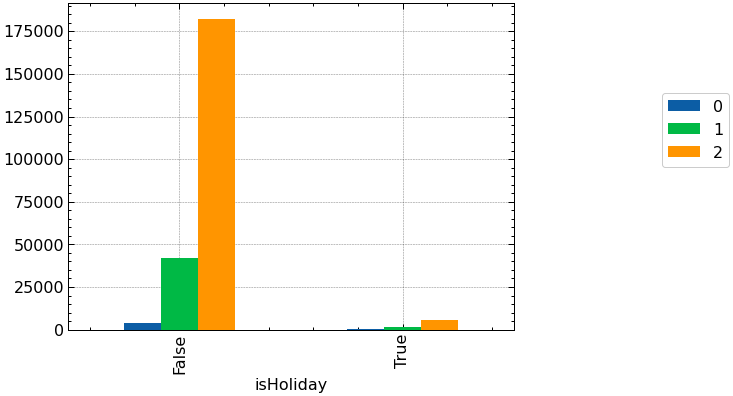

In [325]:
isHoliday=labelEncoded_data['isHoliday']
accident_severity=labelEncoded_data['accident_severity']
road_accident = pd.crosstab(index=isHoliday,columns=accident_severity)
plot_cross = road_accident.plot(kind="bar",stacked=False)
plot_cross.legend(bbox_to_anchor=(1.5,0.75))

### Conclusion:

As noticed from the graph, there exist a relation that in the normal days there are more accidents than in holidays.

# Is there a relation exists between `number_of_casualties` and `isHoliday` ?

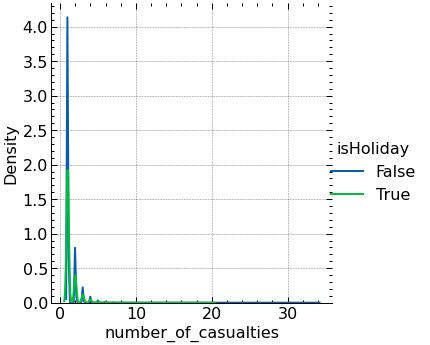

In [326]:
sns.FacetGrid(labelEncoded_data ,height=5,hue="isHoliday").map(sns.kdeplot,"number_of_casualties").add_legend()

### Conclusion:

As noticed from the graph, the number of casualties is higher in the normal days than holidays.

# 2- Encoding the new feature

In [327]:
Encoding_newfeature_df = labelEncoded_data.copy()

In [328]:
Encoding_newfeature_df = pd.get_dummies(labelEncoded_data,columns=['isHoliday'])
Encoding_newfeature_df.shape
Encoding_newfeature_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  1991010SU0975           1991          010SU0975               521300.0   
1  1991010SU0976           1991          010SU0976               521300.0   
2  1991010SU0977           1991          010SU0977               522100.0   
3  199101AB00001           1991          01AB00001               529970.0   
4  199101AB00002           1991          01AB00002               528910.0   

   location_northing_osgr         police_force  accident_severity  \
0                201700.0  Metropolitan Police                  1   
1                201700.0  Metropolitan Police                  2   
2                200300.0  Metropolitan Police                  1   
3                178300.0  Metropolitan Police                  2   
4                178790.0  Metropolitan Police                  2   

   number_of_vehicles  number_of_casualties       date  week_number Weekends  \
0                   2                     4 1991-08-17           33      Yes   
1                   2                     1 1991-06-08           23       No   
2                   2                     1 1991-07-22           30       No   
3                   2                     1 1991-06-01           22      Yes   
4                   1                     1 1991-01-13            2      Yes   

  Season_of_the_year   time local_authority_district first_road_number  \
0             Summer  09:48                Hertsmere              25.0   
1             Summer  00:05                Hertsmere              25.0   
2             Summer  13:15                Hertsmere              25.0   
3             Summer  00:25              Westminster             202.0   
4             Winter  12:02              Westminster             310.0   

   speed_limit                      junction_detail  \
0         70.0  Not at junction or within 20 metres   
1         70.0  Not at junction or within 20 metres   
2         70.0  Not at junction or within 20 metres   
3         30.0                           Crossroads   
4         30.0              T or staggered junction   

            pedestrian_crossing_physical_facilities  light_conditions  \
0  No physical crossing facilities within 50 metres                 4   
1  No physical crossing facilities within 50 metres                 3   
2  No physical crossing facilities within 50 metres                 4   
3  No physical crossing facilities within 50 metres                 1   
4  No physical crossing facilities within 50 metres                 4   

   weather_conditions  road_surface_conditions special_conditions_at_site  \
0                   1                        0                       None   
1                   1                        0                       None   
2                   1                        0                  Roadworks   
3                   0                        4                       None   
4                   1                        0                       None   

    carriageway_hazards  day_of_week_Friday  day_of_week_Monday  \
0                  None                   0                   0   
1                  None                   0                   0   
2  Other object on road                   0                   1   
3                  None                   0                   0   
4                  None                   0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     1                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   1                     0   
4                     0                   1                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  first_road_class_A  \
0                    0                      0                   0   
1        

In [330]:
Encoding_newfeature_df.to_csv('./final_data_MS2.csv')